In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn import preprocessing
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [335]:
pd.set_option('max_columns', None)

In [336]:
data = pd.read_csv("finaldata.csv")
dataframe2 = pd.read_csv("finaldata.csv")
dataframe3 = pd.read_csv("finaldata.csv")

In [337]:
data.head()

,UNITID,TYPE,FORPROFIT,RELIGIOUS,StudyAbroad,TUITVARY,ROOM,BOARD,TUITION1_INDISTRICT_UG,FEE1_INDISTRICT_UG,TUITION2_INSTATE_UG,FEE2_INSTATE_UG,TUITION3_OUTSTATE_UG,FEE3_OUTOFSTATE_UG,INSTATE_TUITION_FEES_P,OUTSTATE_TUITION_FEES_P,OFFCAMPUS_SELF_EXP,OFFCAMPUS_FAMILY_EXP,ADMS_REUIRED_GPA,ADMS_REQUIRED_COLLEGEPREP,NUM_APPS_ADMIT,NUM_FULLTIME_FALLCOHRT,FULLTIME_RETENTIONRATE_SPRING,STUD_TO_FAL_RATIO,TOTAL_FIRSTYR_UG,PRCNT_FIRSTYR_UG,PRCNT_UG_AWARDEDAID,TOTAL_AID_UG,PRCNT_UG_AWARDED_PELL,TOTAL_AMOUNT_PELL_TOUG,PRCENT_FLOANS_TOUG,TOTAL_AMOUNT_FLOANS_UG,TOTAL_SALARY_FT_CONTRACT,DUAL_ENROLLMENT,AP_CREDIT,TEACHER_CERT,COUNSELING_SERVICES,EMPLOYMENT_SERVICE,ACADEMIC_LIBRARY,TUITION_GURANTEE,TUITION_PAYMENTPLAN,ATHASSOC,TOTAL_ASSETS,TOTAL_LIABILITIES,TOTAL_SPENT_ACADEMICSUPP,TOTAL_SPENT_STUDENTSS,TOTAL_PELL,STATEGRANT,LOCAL_GRANT,DISCOUNTSAPPLIED_TO_TUTFEES,STATE_AK,STATE_AL,STATE_AR,STATE_AZ,STATE_CA,STATE_CO,STATE_CT,STATE_DC,STATE_DE,STATE_FL,STATE_FM,STATE_GA,STATE_HI,STATE_IA,STATE_ID,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MA,STATE_MD,STATE_ME,STATE_MI,STATE_MN,STATE_MO,STATE_MS,STATE_MT,STATE_NC,STATE_ND,STATE_NE,STATE_NH,STATE_NJ,STATE_NM,STATE_NV,STATE_NY,STATE_OH,STATE_OK,STATE_OR,STATE_PA,STATE_PR,STATE_RI,STATE_SC,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VI,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,Highest_Bachelor,Highest_Masters,Highest_PostMasters,Highest_Doc
0,100654,1,0,0,1,1,1,1,8610,1414,8610,1414,17220,1414,10024,18634,3090,3440,1,0,9855,1688,54,18,1688,32,87,45409382,71,19916507,75,28131849,1.610014e+07,1,1,1,1,1,1,0,1,1,278440664,263028799,7257779,27527791,18427393,176182,0,22985068,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,100706,1,0,0,1,1,1,1,9730,1608,9730,1608,22126,1608,11338,23734,4076,4076,1,0,5793,1489,82,19,1489,19,72,58435613,24,8533685,39,20051487,2.735629e+07,1,1,1,1,1,1,0,1,1,521103730,418779906,12878882,20821717,9005275,109283,0,50114488,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,100724,1,0,0,1,1,1,1,8328,2740,8328,2740,16656,2740,11068,19396,4228,4228,1,0,7027,1000,62,15,1000,27,93,29288349,74,13341998,78,27329106,2.168918e+07,1,1,1,1,1,1,0,1,1,325537085,354313634,12928881,15714772,11454301,170200,0,10759214,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,100751,1,0,0,1,1,1,0,10780,840,10780,840,30250,840,11620,31090,4620,5692,1,1,39560,6734,87,20,6734,21,67,302907289,17,26353781,36,76675367,1.250019e+08,1,1,1,1,1,1,0,1,1,4881510109,2542095875,103079114,60453485,27196901,772030,0,275547610,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,100830,1,0,0,1,1,1,0,7992,868,7992,868,17952,868,8860,18820,3830,3830,1,0,4606,602,70,16,602,13,77,26325259,47,11282206,54,16818775,1.210158e+07,1,1,1,1,1,1,0,1,1,184716313,182619344,4592684,7303651,11011844,105571,0,15969905,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [338]:
data.shape

(1240, 108)

# Seperate Categorical and Numerical variables 

In [339]:
def seperate_colnames(dataframe):
    global catcols,numcols
    catcols = []
    numcols= []
    for item in dataframe:
        if item == "UNITID":
            continue
        if dataframe[item].max() ==1:
            catcols.append(item)
        else:
            numcols.append(item)
    print(numcols)
    print()
    print(catcols)
            

In [340]:
seperate_colnames(data)

['TUITION1_INDISTRICT_UG', 'FEE1_INDISTRICT_UG', 'TUITION2_INSTATE_UG', 'FEE2_INSTATE_UG', 'TUITION3_OUTSTATE_UG', 'FEE3_OUTOFSTATE_UG', 'INSTATE_TUITION_FEES_P', 'OUTSTATE_TUITION_FEES_P', 'OFFCAMPUS_SELF_EXP', 'OFFCAMPUS_FAMILY_EXP', 'NUM_APPS_ADMIT', 'NUM_FULLTIME_FALLCOHRT', 'FULLTIME_RETENTIONRATE_SPRING', 'STUD_TO_FAL_RATIO', 'TOTAL_FIRSTYR_UG', 'PRCNT_FIRSTYR_UG', 'PRCNT_UG_AWARDEDAID', 'TOTAL_AID_UG', 'PRCNT_UG_AWARDED_PELL', 'TOTAL_AMOUNT_PELL_TOUG', 'PRCENT_FLOANS_TOUG', 'TOTAL_AMOUNT_FLOANS_UG', 'TOTAL_SALARY_FT_CONTRACT', 'ATHASSOC', 'TOTAL_ASSETS', 'TOTAL_LIABILITIES', 'TOTAL_SPENT_ACADEMICSUPP', 'TOTAL_SPENT_STUDENTSS', 'TOTAL_PELL', 'STATEGRANT', 'LOCAL_GRANT', 'DISCOUNTSAPPLIED_TO_TUTFEES']

['TYPE', 'FORPROFIT', 'RELIGIOUS', 'StudyAbroad', 'TUITVARY', 'ROOM', 'BOARD', 'ADMS_REUIRED_GPA', 'ADMS_REQUIRED_COLLEGEPREP', 'DUAL_ENROLLMENT', 'AP_CREDIT', 'TEACHER_CERT', 'COUNSELING_SERVICES', 'EMPLOYMENT_SERVICE', 'ACADEMIC_LIBRARY', 'TUITION_GURANTEE', 'TUITION_PAYMENTPLAN',

In [341]:
type(numcols)

list

# Numerical Data Frame Function

In [342]:
def numdf(dataframe):
    global numdata
    for col in dataframe.columns:
        if col not in numcols:
            col = col
            del dataframe[col]
    numdata = dataframe
    return dataframe

# Categorical  Data Frame Function

In [343]:
def catdf(dataframe):
    global catdata
    for col in dataframe.columns:
        if col not in catcols:
            col = col
            del dataframe[col]
    catdata = dataframe
    return dataframe

# Numerical Data frame

In [344]:
numdf(dataframe2)

,TUITION1_INDISTRICT_UG,FEE1_INDISTRICT_UG,TUITION2_INSTATE_UG,FEE2_INSTATE_UG,TUITION3_OUTSTATE_UG,FEE3_OUTOFSTATE_UG,INSTATE_TUITION_FEES_P,OUTSTATE_TUITION_FEES_P,OFFCAMPUS_SELF_EXP,OFFCAMPUS_FAMILY_EXP,NUM_APPS_ADMIT,NUM_FULLTIME_FALLCOHRT,FULLTIME_RETENTIONRATE_SPRING,STUD_TO_FAL_RATIO,TOTAL_FIRSTYR_UG,PRCNT_FIRSTYR_UG,PRCNT_UG_AWARDEDAID,TOTAL_AID_UG,PRCNT_UG_AWARDED_PELL,TOTAL_AMOUNT_PELL_TOUG,PRCENT_FLOANS_TOUG,TOTAL_AMOUNT_FLOANS_UG,TOTAL_SALARY_FT_CONTRACT,ATHASSOC,TOTAL_ASSETS,TOTAL_LIABILITIES,TOTAL_SPENT_ACADEMICSUPP,TOTAL_SPENT_STUDENTSS,TOTAL_PELL,STATEGRANT,LOCAL_GRANT,DISCOUNTSAPPLIED_TO_TUTFEES
0,8610,1414,8610,1414,17220,1414,10024,18634,3090,3440,9855,1688,54,18,1688,32,87,45409382,71,19916507,75,28131849,1.610014e+07,1,278440664,263028799,7257779,27527791,18427393,176182,0,22985068
1,9730,1608,9730,1608,22126,1608,11338,23734,4076,4076,5793,1489,82,19,1489,19,72,58435613,24,8533685,39,20051487,2.735629e+07,1,521103730,418779906,12878882,20821717,9005275,109283,0,50114488
2,8328,2740,8328,2740,16656,2740,11068,19396,4228,4228,7027,1000,62,15,1000,27,93,29288349,74,13341998,78,27329106,2.168918e+07,1,325537085,354313634,12928881,15714772,11454301,170200,0,10759214
3,10780,840,10780,840,30250,840,11620,31090,4620,5692,39560,6734,87,20,6734,21,67,302907289,17,26353781,36,76675367,1.250019e+08,1,4881510109,2542095875,103079114,60453485,27196901,772030,0,275547610
4,7992,868,7992,868,17952,868,8860,18820,3830,3830,4606,602,70,16,602,13,77,26325259,47,11282206,54,16818775,1.210158e+07,1,184716313,182619344,4592684,7303651,11011844,105571,0,15969905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,12000,150,12000,150,12000,150,12150,12150,3800,5600,35,23,61,12,23,32,80,667808,59,223850,0,0,2.168918e+07,0,7154786,4237481,81114,643492,295511,931387,1915391,0
1236,8500,150,8500,150,8500,150,8650,8650,3800,5600,40,34,88,22,34,22,99,988600,61,484303,0,0,2.168918e+07,0,1690872,132242,9870,671452,643826,544723,1428549,0
1237,8500,150,8500,150,8500,150,8650,8650,3800,5600,40,28,75,27,28,43,54,178438,38,129212,0,0,2.168918e+07,0,6778180,3917517,0,415860,164515,280679,1826216,76379
1238,4776,780,4776,780,4776,780,5556,5556,3466,3466,85,58,78,20,59,19,46,466783,23,202088,22,264695,2.168918e+07,0,934251,411154,313687,853465,425873,41905,2692694,0


# Categorical  Data frame

In [345]:
catdf(dataframe3)

,TYPE,FORPROFIT,RELIGIOUS,StudyAbroad,TUITVARY,ROOM,BOARD,ADMS_REUIRED_GPA,ADMS_REQUIRED_COLLEGEPREP,DUAL_ENROLLMENT,AP_CREDIT,TEACHER_CERT,COUNSELING_SERVICES,EMPLOYMENT_SERVICE,ACADEMIC_LIBRARY,TUITION_GURANTEE,TUITION_PAYMENTPLAN,STATE_AK,STATE_AL,STATE_AR,STATE_AZ,STATE_CA,STATE_CO,STATE_CT,STATE_DC,STATE_DE,STATE_FL,STATE_FM,STATE_GA,STATE_HI,STATE_IA,STATE_ID,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MA,STATE_MD,STATE_ME,STATE_MI,STATE_MN,STATE_MO,STATE_MS,STATE_MT,STATE_NC,STATE_ND,STATE_NE,STATE_NH,STATE_NJ,STATE_NM,STATE_NV,STATE_NY,STATE_OH,STATE_OK,STATE_OR,STATE_PA,STATE_PR,STATE_RI,STATE_SC,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VI,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,Highest_Bachelor,Highest_Masters,Highest_PostMasters,Highest_Doc
0,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,1,1,1,0,1,0,1,1,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1236,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1237,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1238,0,1,0,0,0,1,1,1,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Coorelation 

<AxesSubplot:>

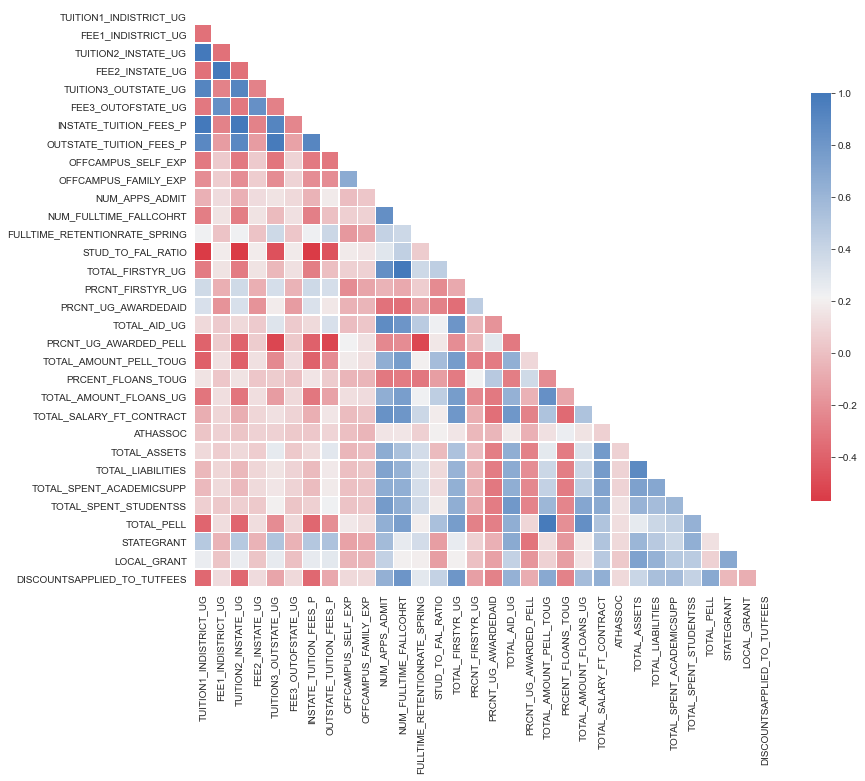

In [346]:
corr = numdata.corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(13, 15))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.25, cbar_kws={"shrink": .5}, ax=ax)

# Find Colinear Columns

In [347]:
cor_matrix=numdata.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.80)]
print(); print(to_drop)


['TUITION2_INSTATE_UG', 'FEE2_INSTATE_UG', 'TUITION3_OUTSTATE_UG', 'FEE3_OUTOFSTATE_UG', 'INSTATE_TUITION_FEES_P', 'OUTSTATE_TUITION_FEES_P', 'NUM_FULLTIME_FALLCOHRT', 'TOTAL_FIRSTYR_UG', 'TOTAL_AID_UG', 'TOTAL_AMOUNT_FLOANS_UG', 'TOTAL_SALARY_FT_CONTRACT', 'TOTAL_LIABILITIES', 'TOTAL_PELL', 'DISCOUNTSAPPLIED_TO_TUTFEES']


# Drop Colinear Columns 

In [348]:
def drop_colinear_cols(columns):
    global dataframe
    data = pd.read_csv("finaldata.csv")
    for cols in data.columns:
        if cols in to_drop and cols != "FULLTIME_RETENTIONRATE_SPRING":
            del data[cols]
    dataframe = data
    print("New Data frame is named:dataframe")
    return data

# VIF 

In [349]:
def vif_function(dataframe):
    vif_data = pd.DataFrame()
    vif_data["feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i)
                          for i in range(len(dataframe.columns))]
    userinput = input("Do you want to display all columns VIF :")
    inputyes = ["Yes","yes","YES","Y","y"]
    inputno = ["N","n","No","NO"]
    if userinput in inputyes:
        pd.set_option('max_rows', None)
    else:
        pd.set_option("max_rows",20)
        pass
    print(vif_data)
    userinput2 = int(input("What is your Maximum VIF VALUE:"))
    valuesover = []
    for x, y in vif_data.iterrows():
        if (y[1]) >=userinput2:
            valuesover.append(y[0])
    return valuesover
    

In [351]:
vif_function(dataframe)

Do you want to display all columns VIF :no
                feature         VIF
0                UNITID    1.997218
1                  TYPE   24.636754
2             FORPROFIT    2.342342
3             RELIGIOUS    1.216960
4           StudyAbroad    1.915403
..                  ...         ...
89             STATE_WY    3.084413
90     Highest_Bachelor  148.049916
91      Highest_Masters  244.616918
92  Highest_PostMasters   95.558780
93          Highest_Doc  326.293165

[94 rows x 2 columns]
What is your Maximum VIF VALUE:15


['TYPE',
 'TUITVARY',
 'STATE_AL',
 'STATE_AR',
 'STATE_AZ',
 'STATE_CA',
 'STATE_CO',
 'STATE_CT',
 'STATE_FL',
 'STATE_GA',
 'STATE_IA',
 'STATE_IL',
 'STATE_IN',
 'STATE_KS',
 'STATE_KY',
 'STATE_LA',
 'STATE_MA',
 'STATE_MD',
 'STATE_ME',
 'STATE_MI',
 'STATE_MN',
 'STATE_MO',
 'STATE_MS',
 'STATE_MT',
 'STATE_NC',
 'STATE_ND',
 'STATE_NE',
 'STATE_NH',
 'STATE_NJ',
 'STATE_NY',
 'STATE_OH',
 'STATE_OK',
 'STATE_OR',
 'STATE_PA',
 'STATE_RI',
 'STATE_SC',
 'STATE_SD',
 'STATE_TN',
 'STATE_TX',
 'STATE_VA',
 'STATE_WA',
 'STATE_WI',
 'STATE_WV',
 'Highest_Bachelor',
 'Highest_Masters',
 'Highest_PostMasters',
 'Highest_Doc']